# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array
from scipy.stats import norm

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Definition of probability intervals for assumed probability density function

Assuming gaussian probability distribution with variable sigma

In [3]:
# Variable pdf width!!!
# Precision better for small than for large mean

def sigma(mean):
#    sig = 0.6+ 0.15*mean
    sig = 1.+np.arctan(mean-1)/np.pi
    return sig

# Return value of x corresponsing to upper (one-side) limit on given CL
# Use 1-CL for lower limit

def problim(mean,cl):
    
# Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = norm.isf(1-cl)

    return mean+xlim*sigma(mean) 



### (3) Define set of hypothesis

In [4]:
# Considered values of true mean

# vmean = np.linspace(0.,6.,13)
# vmean = np.linspace(0.,6.,61)
vmean = np.linspace(0.,6.,601)

CL = 0.95            # One sided! So the inteval will be 90% CL

# Upper an lower edges of x probability intervals

vhig = problim(vmean,CL)
vlow = problim(vmean,1-CL)


### (4)  Print interval information

In [5]:
print("\nProbability intervals for x:")

print("\n  true mean     x_low     x_high")

for im in range(vmean.size) :
    print ("%10.3f   %8.3f  %8.3f" % (vmean[im],vlow[im],vhig[im]))



Probability intervals for x:

  true mean     x_low     x_high
     0.000     -1.234     1.234
     0.010     -1.226     1.246
     0.020     -1.219     1.259
     0.030     -1.212     1.272
     0.040     -1.204     1.284
     0.050     -1.197     1.297
     0.060     -1.190     1.310
     0.070     -1.183     1.323
     0.080     -1.175     1.335
     0.090     -1.168     1.348
     0.100     -1.161     1.361
     0.110     -1.154     1.374
     0.120     -1.147     1.387
     0.130     -1.140     1.400
     0.140     -1.133     1.413
     0.150     -1.126     1.426
     0.160     -1.119     1.439
     0.170     -1.112     1.452
     0.180     -1.105     1.465
     0.190     -1.098     1.478
     0.200     -1.092     1.492
     0.210     -1.085     1.505
     0.220     -1.078     1.518
     0.230     -1.071     1.531
     0.240     -1.065     1.545
     0.250     -1.058     1.558
     0.260     -1.051     1.571
     0.270     -1.045     1.585
     0.280     -1.038     1.598
     0.2

### (5) Draw probability intervals

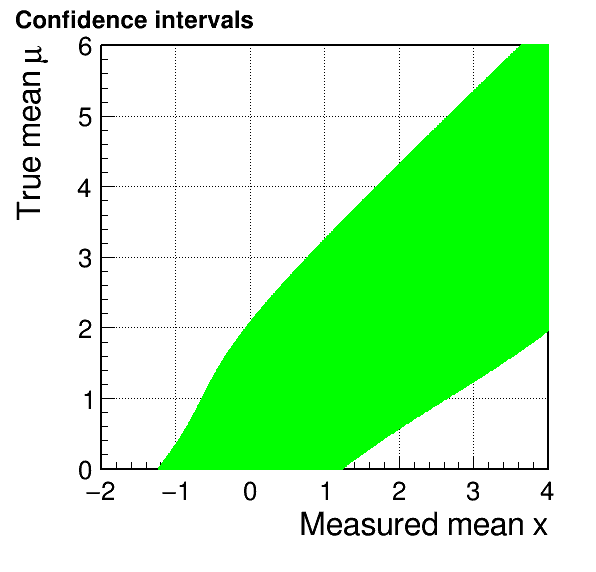

Info in <TCanvas::Print>: png file 06_gauss_interval2_1_601.png has been created


In [6]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

gStyle.SetCanvasDefH(600)  # To match that in the paper

cexp = TCanvas('cexp')
   
# Histogram to produce frame

Xmin=-2
Xmax=4
Ymin=0
Ymax=6

hexp = TH1D('hexp','Confidence intervals',10, Xmin, Xmax)

hexp.GetXaxis().SetTitle("Measured mean x")
hexp.GetYaxis().SetTitle("True mean #mu")
hexp.SetMinimum(Ymin)
hexp.SetMaximum(Ymax)
hexp.SetLineWidth(0)    # To suppress horizontal line at zero

# No statistics

hexp.SetStats(0)

# Plot empty histogram (frame)

hexp.SetMarkerStyle(20)
hexp.DrawCopy('HIST')

# Overlay probability interval lines

lint = TLine()
lint.SetLineColor(3)
lint.SetLineWidth(2)

for im in range(vmean.size) :
    vl=max(vlow[im],Xmin)
    vh=min(vhig[im],Xmax)
    lint.DrawLine(vl,vmean[im],vh,vmean[im])

cexp.Update()
fname = '06_gauss_interval2_1_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

### (6) Generate limit graphs

In [7]:
lgr = TGraph(vmean.size,array('d',vlow),array('d',vmean))
hgr = TGraph(vmean.size,array('d',vhig),array('d',vmean))

# Set graph options

lgr.SetNameTitle("lgr","Lower edge of x probability interval")
hgr.SetNameTitle("hgr","Upper edge of x probability interval")

lgr.SetMarkerStyle(20)
lgr.SetMarkerSize(0.7)
lgr.SetMarkerColor(2)
lgr.SetLineColor(2)
lgr.SetLineWidth(2)

hgr.SetMarkerStyle(20)
hgr.SetMarkerSize(0.7)
hgr.SetMarkerColor(4)
hgr.SetLineColor(4)
hgr.SetLineWidth(2)


### (7) Plot results

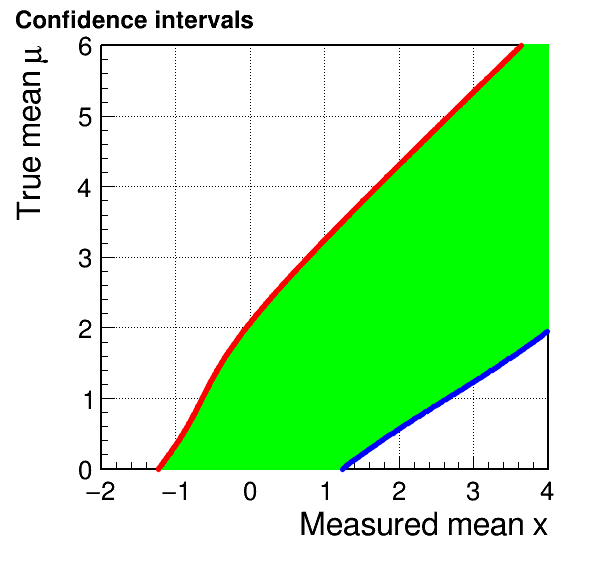

Info in <TCanvas::Print>: png file 06_gauss_interval2_2_601.png has been created


In [8]:
# Plot limit graphs

lgr.Draw('PL')
hgr.Draw('PL')

# Store and show

cexp.Update()
fname = '06_gauss_interval2_2_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

### (8) Hypothetical measurement

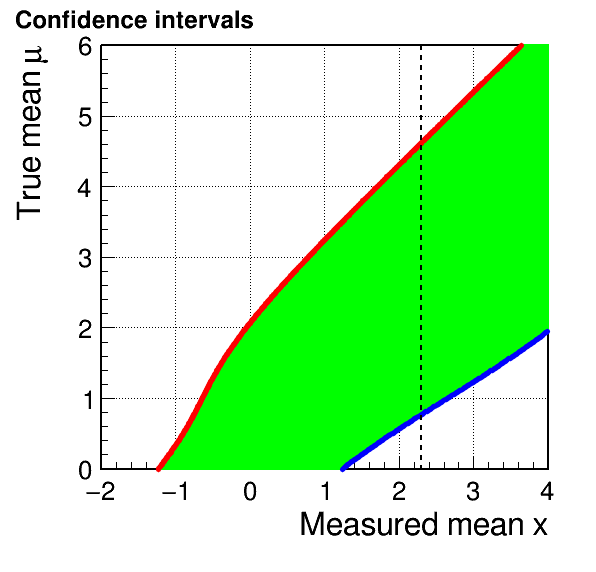

Info in <TCanvas::Print>: png file 06_gauss_interval2_3_601.png has been created


In [9]:
Xm = 2.3

lxm = TLine()
lxm.SetLineColor(1)
lxm.SetLineWidth(2)
lxm.SetLineStyle(7)

lxm.DrawLine(Xm,Ymin,Xm,Ymax)

cexp.Update()
fname = '06_gauss_interval2_3_'+str(vmean.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

In [10]:
# Look for proper point in limit table
# Interpolate between two points

for im in range(vmean.size-1) :
    if Xm > vlow[im] and Xm <= vlow[im+1]:
        frac = (Xm-vlow[im])/(vlow[im+1]-vlow[im])
        print('Upper limit : ',frac*vmean[im+1]+(1-frac)*vmean[im])
    if Xm > vhig[im] and Xm <= vhig[im+1]:
        frac = (Xm-vhig[im])/(vhig[im+1]-vhig[im])
        print('Lower limit : ',frac*vmean[im+1]+(1-frac)*vmean[im])        

Lower limit :  0.7723424007511847
Upper limit :  4.626403283767399
